# Symbolic Regression with `PySR`

- https://github.com/MilesCranmer/PySR
- https://ai.damtp.cam.ac.uk/pysr

# Toy Examples with Code

In [ ]:
import numpy as np
from pysr import *

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## 1. Simple search

Here's a simple example where we find the expression `y = 2 cos(x3) + x0^2 - 2`.

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 2 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 2
model = PySRRegressor(binary_operators=["+", "-", "*", "/"], unary_operators=["cos", "sin", "exp"])
model.fit(X, y)
print(model)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.535e+01  1.594e+01  y = 1.9911
3           4.600e+00  8.533e-01  y = x₀ * x₀
5           1.988e+00  4.196e-01  y = (x₀ * x₀) - 1.6163
7           1.979e+00  2.230e-03  y = ((x₀ * x₀) + -1.6551) * 1.0199
8           4.969e-01  1.382e+00  y = (x₀ * x₀) + (cos(x₃) + -1.8082)
10          1.041e-13  7.971e+00  y = ((x₀ * x₀) + (cos(x₃) * 2)) + -2
12          7.201e-14  1.844e-01  y = ((x₀ * x₀) + ((cos(x₃) * 2) - 0.46951)) + -1.5305
13          6.475e-14  1.062e-01  y = ((x₀ * x₀) + -1.7871) + ((cos(x₃) + cos(x₃)) + -0.2128...
                                      6)
15          5.692e-14  6.447e-02  y = ((cos(x₃) * 0.84582) + ((x₀ * x₀) + -2)) + (cos(x₃) * ...
                                      1.1542)
17          5.414e-14  2.508e-02  y = (cos(x₃) * 1.1542) + ((((x₀ * x₀) + (cos(x₃) * 0.84582...
                                    

In [ ]:
model.sympy()

x0*x0 + cos(x3)*2.0 - 1.5304941 - 1*0.4695059

## 2. Custom operator

Here, we define a custom operator and use it to find an expression:

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 1 / X[:, 0]
model = PySRRegressor(
    binary_operators=["+", "*"],
    unary_operators=["inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
)
model.fit(X, y)
print(model)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           7.898e+01  1.594e+01  y = -1.198
2           5.431e-15  1.594e+01  y = inv(x₀)
6           5.422e-15  4.091e-04  y = inv(x₀) + (x₁ * -3.5946e-09)
7           3.157e-15  5.408e-01  y = inv(x₀) + (inv(x₄) * 7.1252e-10)
9           2.589e-15  9.924e-02  y = inv(x₀) + (7.1252e-10 * (x₂ * inv(x₄)))
11          2.580e-15  1.718e-03  y = ((8.3043e-10 * x₂) * (inv(x₄) + x₃)) + inv(x₀)
13          2.554e-15  5.190e-03  y = (x₂ * (((x₄ * -2.8096) + inv(x₄)) * 7.4967e-10)) + inv...
                                      (x₀)
14          2.021e-15  2.341e-01  y = ((x₂ * (inv(0.91875 + x₄) + inv(x₄))) * 8.3043e-10) + ...
                                      inv(x₀)
16          2.012e-15  2.203e-03  y = ((7.4793e-10 * ((inv(x₄) + x₃) + inv(0.91875 + x₄))) *...
                                       x₂) + inv(x₀)
18          1.985e-15  6.667e-03  y

## 3. Multiple outputs

Here, we do the same thing, but with multiple expressions at once, each requiring a different feature.

In [ ]:
X = 2 * np.random.randn(100, 5)
y = 1 / X[:, [0, 1, 2]]
model = PySRRegressor(
    binary_operators=["+", "*"],
    unary_operators=["inv(x) = 1/x"],
    extra_sympy_mappings={"inv": lambda x: 1/x},
)
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 7.730e+05
Progress: 3770 / 9300 total iterations (40.538%)
════════════════════════════════════════════════════════════════════════════════════════════════════
Best equations for output 1
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.312e+03  1.594e+01  y₀ = 4.0307
2           1.289e-14  1.594e+01  y₀ = inv(x₀)
6           1.289e-14  4.304e-05  y₀ = (-2.2893e-09 * x₂) + inv(x₀)
7           4.021e-15  1.165e+00  y₀ = inv(x₀) + (inv(x₀) * 3.2998e-08)
9           3.417e-15  8.137e-02  y₀ = ((inv(x₀) + 0.27211) * 3.2864e-08) + inv(x₀)
13          3.129e-15  2.206e-02  y₀ = inv(x₀) + ((inv(x₀) + ((x₃ * 0.060355) + 0.087464)) ...
                                       * 3.3389e-08)
14          2.944e-15  6.071e-02  y₀ = inv(x₀) + ((inv(x₀) + (inv(x₀ + -0.61291) * -0.08345...
                                       2)) * 3.2949e-08)
16          2.858

[ Info: Final populations:
[ Info: Output 1:
[ Info: Output 2:
[ Info: Output 3:
[ Info: Results saved to:


PySRRegressor.equations_ = [
[
	    pick      score                                           equation  \
	0          0.000000                                          4.0307164   
	1         39.161999                                            inv(x0)   
	2          0.000172                     (x2 * -3.7715755e-9) + inv(x0)   
	3          1.164151                  inv(x0) + (inv(x0) * 3.299847e-8)   
	4          0.081373  ((inv(x0) + 0.27211195) * 3.2864442e-8) + inv(x0)   
	5          0.022063  inv(x0) + ((inv(x0) + ((x3 * 0.06035489) + 0.0...   
	6   >>>>   0.060713  inv(x0) + ((inv(x0) + (inv(x0 + -0.6129072) * ...   
	7          0.014926  ((inv(x0) + ((inv(x0 + -0.6594771) + -0.904190...   
	8          0.010204  inv(x0) + ((((x0 + (inv(x0 + -0.6594771) + -1....   
	9          0.052636  inv(x0) + ((inv(x0) + ((inv(x4 + ((x2 * -0.913...   
	10         0.000441  ((((x0 + (inv((x4 + -2.0643194) * (x1 + x4)) +...   
	11         0.044171  (((((x3 * (inv((x4 + inv(x3)) + -1.3607032) + ...   
	12         0.003693  inv(x0) + ((inv(x0) + (((x3 * (inv(-1.3607032 ...   
	13         0.052219  inv(x0) + ((inv(x0) + ((x0 + (((inv(inv(x3) + ...   
	14         0.004897  inv(x0) + ((inv(x0) + (((x0 + ((inv((x4 + inv(...   
	15         0.003953  inv(x0) + (((((x0 + ((inv(x4 + (inv(x3) + -1.3...   
	
	            loss  complexity  
	0   1.312449e+03           1  
	1   1.288969e-14           2  
	2   1.288081e-14           6  
	3   4.021228e-15           7  
	4   3.417266e-15           9  
	5   3.128609e-15          13  
	6   2.944312e-15          14  
	7   2.857714e-15          16  
	8   2.799982e-15          18  
	9   2.520206e-15          20  
	10  2.517986e-15          22  
	11  2.409184e-15          23  
	12  2.400302e-15          24  
	13  2.278178e-15          25  
	14  2.255973e-15          27  
	15  2.238210e-15          29  
], [
	   pick      score                                           equation  \
	0         0.000000                                          1.0199101   
	1        36.771885                                            inv(x1)   
	2         0.011933                                      inv(x1) + 0.0   
	3         0.007296                inv(x1) + (inv(x3) * 3.4421768e-10)   
	4  >>>>   1.211453              inv(x1 + ((x2 * x2) * 4.3562043e-10))   
	5         0.003292  inv(x1 + (inv(x0 + 1.1893965) * (x2 * 3.710152...   
	6         0.080589  inv(((x2 * x2) * 4.3562043e-10) + x1) + (inv(x...   
	7         0.005864  inv((x2 * ((x2 + inv(-0.15074886 + (x3 + x0)))...   
	8         0.012011  inv((3.4421768e-10 * ((inv(x2 + 0.8057281) + (...   
	
	           loss  complexity  
	0  1.185729e+02           1  
	1  1.271039e-14           2  
	2  1.241063e-14           4  
	3  1.214195e-14           7  
	4  3.615441e-15           8  
	5  3.579914e-15          11  
	6  3.047007e-15          13  
	7  3.011480e-15          15  
	8  2.904899e-15          18  
], [
	    pick      score                                           equation  \
	0          0.000000                                        -0.69488716   
	1         34.023919                                            inv(x2)   
	2          0.073235                                      inv(x2) * 1.0   
	3          0.533378                        inv(x2 * 1.00811) * 1.00811   
	4          0.099654                           (x4 * inv(x4)) * inv(x2)   
	5          0.136379          ((x0 * inv(x2)) * 2.1610715e-8) + inv(x2)   
	6          0.571825  (((inv(x2) * 1.9704094) + -0.5038624) * 0.5075...   
	7          0.964677  inv(x2) + (inv((x2 * 7.552444) + 0.38081506) *...   
	8          0.017395  inv(x2) + (inv((x2 * (inv(x1) + 13.019386)) + ...   
	9   >>>>   0.143841  inv(x2) + (inv(((inv(x0 + -3.0620117) + 13.019...   
	10         0.012351  (inv((x2 * (inv((x2 + (0.8564156 * (x2 + x3)))...   
	11         0.005641  ((inv((x2 * (inv(x1 * (x2 + ((x2 + x3) * 0.856...   
	12         0.032311  (inv((x2 * ((inv(x1 * (((x3 + x2) * 0.8564156)...   
	
	            loss  complexity  
	0

  - outputs/20250518_135229_9mbCnN/hall_of_fame_output3.csv


## 4. Plotting an expression

For now, let's consider the expressions for output 0. We can see the LaTeX version of this with:

In [ ]:
model.sympy()[0]

(-0.08345172/(x0 - 0.6129072) + 1/x0)*3.2948947e-8 + 1/x0

or output 1 with `model.sympy()[1]`.

Let's plot the prediction against the truth.

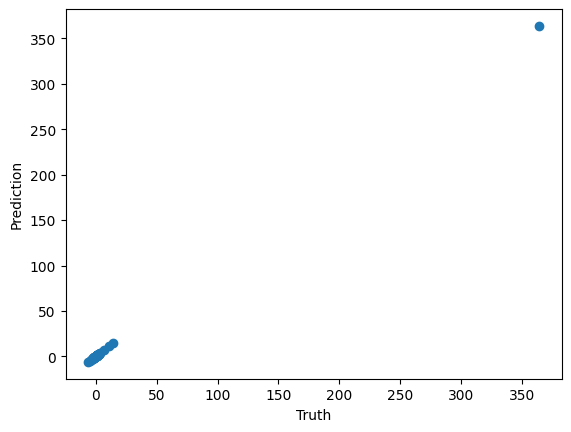

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y[:, 0], model.predict(X)[:, 0])
plt.xlabel('Truth')
plt.ylabel('Prediction')
plt.show()

We may also plot the output of a particular expression by passing the index of the expression to predict (or sympy or latex as well)

## 5. Feature selection

PySR and evolution-based symbolic regression in general performs very poorly when the number of features is large. Even, say, 10 features might be too much for a typical equation search.

If you are dealing with high-dimensional data with a particular type of structure, you might consider using deep learning to break the problem into smaller "chunks" which can then be solved by PySR, as explained in the paper [2006.11287](https://arxiv.org/abs/2006.11287).

For tabular datasets, this is a bit trickier. Luckily, PySR has a built-in feature selection mechanism. Simply declare the parameter select_k_features=5, for selecting the most important 5 features.

Here is an example. Let's say we have 30 input features and 300 data points, but only 2 of those features are actually used:

In [ ]:
X = np.random.randn(300, 30)
y = X[:, 3]**2 - X[:, 19]**2 + 1.5

Let's create a model with the feature selection argument set up:

In [ ]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    select_k_features=5,
)

Now let's fit this:

In [ ]:
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Using features [np.str_('x0') np.str_('x3') np.str_('x8') np.str_('x19') np.str_('x20')]
[ Info: Started!



Expressions evaluated per second: 4.450e+05
Progress: 2449 / 3100 total iterations (79.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.414e+00  1.594e+01  y = 1.632
3           1.838e+00  3.097e-01  y = x3 * x3
5           1.314e+00  1.677e-01  y = (x3 * x3) + 0.72375
7           1.307e+00  2.884e-03  y = ((x3 * x3) * 1.0637) - -0.66591
9           3.275e-14  7.971e+00  y = ((x3 * x3) - (x19 * x19)) + 1.5
11          2.786e-14  8.089e-02  y = (((x3 * x3) + 1.0852) - (x19 * x19)) - -0.41477
13          2.528e-14  4.853e-02  y = (((x3 * x3) + 0.62052) - ((x19 * x19) + -0.68506)) + 0...
                                      .19442
15          2.287e-14  5.014e-02  y = ((x3 * x3) + (((x19 * (x19 * -34.189)) * 0.029249) + 1...
                                      .5171)) + -0.

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick      score                                           equation  \
	0          0.000000                                           1.631974   
	1          0.309679                                            x3 * x3   
	2          0.167739                              (x3 * x3) + 0.7237545   
	3          0.002884                 ((x3 * x3) * 1.063695) - -0.665906   
	4         15.658585                    ((x3 * x3) - (x19 * x19)) + 1.5   
	5   >>>>   0.081359           (x3 * x3) + ((x19 * (x19 * -1.0)) + 1.5)   
	6          0.048061  (((x3 * x3) + 0.62052464) - ((x19 * x19) + -0....   
	7          0.064452  ((((x19 * (x19 * -34.189064)) * 0.029249119) +...   
	8          0.001204  -0.017067667 + (((x3 * x3) + -3.7016332e-9) + ...   
	9          0.007159  (x3 * x3) + ((((x3 * -2.3308187e-8) + 1.5) + (...   
	10         0.016553  ((((x3 * -2.6607044e-8) + 1.5) + (x3 * -2.6607...   
	11         0.019920  (x3 * x3) + ((((x19 * -34.189064) * x19) * 0.0...   
	12         0.017828  (((x19 * (x19 * -34.189064)) * 0.029249119) + ...   
	13         0.001457  (x3 * x3) + ((((x19 * -34.189064) * x19) * 0.0...   
	
	            loss  complexity  
	0   3.414486e+00           1  
	1   1.837983e+00           3  
	2   1.314150e+00           5  
	3   1.306591e+00           7  
	4   3.275413e-14           9  
	5   2.783547e-14          11  
	6   2.528444e-14          13  
	7   2.222651e-14          15  
	8   2.217307e-14          17  
	9   2.154716e-14          21  
	10  2.084550e-14          23  
	11  2.003134e-14          25  
	12  1.932968e-14          27  
	13  1.927343e-14          29  
]

  - outputs/20250518_135328_Sq8WVT/hall_of_fame.csv


In [ ]:
model.sympy()

x19*x19*(-1.0) + x3*x3 + 1.5

Before the Julia backend is launched, you can see the string:

`Using features ['x3', 'x5', 'x7', 'x19', 'x21']`

which indicates that the feature selection (powered by a gradient-boosting tree) has successfully selected the relevant two features.

This fit should find the solution quickly, whereas with the huge number of features, it would have struggled.

This simple preprocessing step is enough to simplify our tabular dataset, but again, for more structured datasets, you should try the deep learning approach mentioned above.

## 6. Denoising

Many datasets, especially in the observational sciences, contain intrinsic noise. PySR is noise robust itself, as it is simply optimizing a loss function, but there are still some additional steps you can take to reduce the effect of noise.

One thing you could do, which we won't detail here, is to create a custom log-likelihood given some assumed noise model. By passing weights to the fit function, and defining a custom loss function such as `elementwise_loss="myloss(x, y, w) = w * (x - y)^2"`, you can define any sort of log-likelihood you wish. (However, note that it must be bounded at zero)

However, the simplest thing to do is preprocessing, just like for feature selection. To do this, set the parameter `denoise=True`. This will fit a Gaussian process (containing a white noise kernel) to the input dataset, and predict new targets (which are assumed to be denoised) from that Gaussian process.

For example:

In [ ]:
X = np.random.randn(100, 5)
noise = np.random.randn(100) * 0.1
y = np.exp(X[:, 0]) + X[:, 1] + X[:, 2] + noise

Let's create and fit a model with the denoising argument set up:

In [ ]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    denoise=True,
)
model.fit(X, y)
print(model)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 4 of parameter k1__k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.810e+00  1.594e+01  y = 1.5463
2           2.170e+00  5.631e-01  y = exp(x₀)
4           1.040e+00  3.677e-01  y = exp(x₀) + x₂
6           7.690e-03  2.453e+00  y = (x₁ + x₂) + exp(x₀)
8           7.294e-03  2.642e-02  y = (exp(x₀) + (x₂ * 0.98084)) + x₁
10          6.826e-03  3.316e-02  y = ((exp(x₀) + (x₂ + 0.036658)) + x₁) * 0.98849
11          6.666e-03  2.374e-02  y = (((0.011245 / exp(x₂)) + x₂) + exp(x₀)) + x₁
13          6.455e-03  1.612e-02  y = ((exp(x₀) + x₁) * 0.99298) + ((0.013902 / exp(x₂)) + x...
                                      ₂)
15          5.955e-03  4.031e-02  y = (x₁ + ((0.010458 / ((0.033259 / x₂) + exp(x₂))) + x₂))...
                                       + exp(x₀)
17          5.603e-03  3.046e-02  y = x₂ + (((x₁ + (0.013019 / exp((0.10695 / x₂) + x₂))) + ...
                                      exp(x

In [ ]:
model.sympy()

x1 + x2 + exp(x0)

If all goes well, you should find that it predicts the correct input equation, without the noise term!

## 7. Julia packages and types

PySR uses [SymbolicRegression.jl](https://github.com/MilesCranmer/SymbolicRegression.jl) as its search backend. This is a pure Julia package, and so can interface easily with any other Julia package. For some tasks, it may be necessary to load such a package.

For example, let's say we wish to discovery the following relationship:

$$
y = p_{3x+1} - 5,
$$

where $p_i$ is the $i$-th prime number, and $x$ is the input feature.

Let's see if we can discover this using the [Primes.jl](https://github.com/JuliaMath/Primes.jl) package.

First, let's get the Julia backend:

In [ ]:
from pysr import jl

`jl` stores the Julia runtime.

Now, let's run some Julia code to add the Primes.jl package to the PySR environment:

In [ ]:
jl.seval("""
import Pkg
Pkg.add("Primes")
""")

   Resolving package versions...
  No Changes to `~/workspace/DL-KHU/.venv/julia_env/Project.toml`
  No Changes to `~/workspace/DL-KHU/.venv/julia_env/Manifest.toml`


This imports the Julia package manager, and uses it to install `Primes.jl`. Now let's import `Primes.jl`:

In [ ]:
jl.seval("import Primes")

Now, we define a custom operator:

In [ ]:
jl.seval("""
function p(i::T) where T
    if (0.5 < i < 1000)
        return T(Primes.prime(round(Int, i)))
    else
        return T(NaN)
    end
end
""")

p (generic function with 1 method)

We have created a a function `p`, which takes an arbitrary number as input. `p` first checks whether the input is between 0.5 and 1000. If out-of-bounds, it returns `NaN`. If in-bounds, it rounds it to the nearest integer, compures the corresponding prime number, and then converts it to the same type as input.

Next, let's generate a list of primes for our test dataset. Since we are using juliacall, we can just call `p` directly to do this:

In [ ]:
primes = {i: jl.p(i*1.0) for i in range(1, 999)}

Next, let's use this list of primes to create a dataset of $x, y$ pairs:

In [ ]:
import numpy as np

X = np.random.randint(0, 100, 100)[:, None]
y = [primes[3*X[i, 0] + 1] - 5 + np.random.randn()*0.001 for i in range(100)]

Note that we have also added a tiny bit of noise to the dataset.

Finally, let's create a PySR model, and pass the custom operator. We also need to define the sympy equivalent, which we can leave as a placeholder for now:

In [ ]:
from pysr import PySRRegressor
import sympy

class sympy_p(sympy.Function):
    pass

model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["p"],
    niterations=100,
    extra_sympy_mappings={"p": sympy_p}
)

We are all set to go! Let's see if we can find the true relation:

In [ ]:
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.970e+04
Progress: 159 / 3100 total iterations (5.129%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.517e+05  1.594e+01  y = 937.67
3           4.131e+03  2.222e+00  y = x₀ * 18.641
4           1.444e+01  5.656e+00  y = p(x₀ * 3)
6           1.238e+01  7.698e-02  y = p(x₀ * 3) + 1.3258
8           1.237e+01  5.288e-04  y = p((x₀ + x₀) + x₀) - -1.4399
10          8.902e-07  7.735e+00  y = p((x₀ + 1.1165) + (x₀ + x₀)) + -5
14          8.547e-07  1.018e-02  y = (-4.9999 - (0.0023642 / x₀)) + p(((x₀ + x₀) + x₀) - -0...
                                      .64426)
15          8.470e-07  9.011e-03  y = (p((x₀ + 0.74614) + (x₀ + x₀)) + -4.9999) - (0.0047367...
                                       / p(x₀))
23          8.469e-07  1.156e-05  y = (p

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                           937.6686   
	1         2.222139                                     x0 * 18.641216   
	2         5.656226                                        p(x0 * 3.0)   
	3         0.176991                      p(x0 * 3.0149255) + -3.716838   
	4   >>>>  8.123322            p((x0 - -0.34275728) * 2.9993663) - 5.0   
	5         0.000818       p((x0 + (1.1147897 + x0)) + x0) + -4.9999766   
	6         0.022418  (-4.9999075 - (0.0025804727 / x0)) + p((x0 - -...   
	7         0.002309  (p(x0 + ((x0 + x0) - -0.7013687)) - (0.0049215...   
	8         0.007608  p(x0 + (x0 + (x0 - -0.8265352))) + (-4.9999638...   
	9         0.000076  (-4.9999638 - (0.007910709 / ((x0 * x0) + -0.2...   
	10        0.000802  (p((x0 - -0.8265352) + (x0 + x0)) + -5.0000186...   
	11        0.008352  (-4.9998436 - (x0 * 2.3540163e-6)) + (p(x0 + (...   
	12        0.005733  (p((x0 + (x0 - -0.9162645)) + x0) - (0.0009398...   
	13        0.004332  -4.9999766 + (p((x0 - -0.9011458) + (x0 + x0))...   
	14        0.008328  (p((3.0 * x0) - -1.403668) + -4.9999804) - (0....   
	
	            loss  complexity  
	0   3.516859e+05           1  
	1   4.130756e+03           3  
	2   1.443982e+01           4  
	3   1.013513e+01           6  
	4   8.912541e-07           8  
	5   8.897969e-07          10  
	6   8.507835e-07          12  
	7   8.449094e-07          15  
	8   8.385055e-07          16  
	9   8.383787e-07          18  
	10  8.370355e-07          20  
	11  8.300740e-07          21  
	12  8.206101e-07          23  
	13  8.135310e-07          25  
	14  8.000930e-07          27  
]

  - outputs/20250518_135823_SClLvY/hall_of_fame.csv


if all works out, you should be able to see the true relation (note that the constant offset might not be exactly 1, since it is allowed to round to the nearest integer). You can get the sympy version of the best equation with:

In [ ]:
model.sympy()

sympy_p((x0 - 1*(-0.34275728))*2.9993663) - 1*5.0

## 8. Complex numbers

PySR can also search for complex-valued expressions. Simply pass data with a complex datatype (e.g., `np.complex128`), and PySR will automatically search for complex-valued expressions:

In [ ]:
import numpy as np

X = np.random.randn(100, 1) + 1j * np.random.randn(100, 1)
y = (1 + 2j) * np.cos(X[:, 0] * (0.5 - 0.2j))

model = PySRRegressor(
    binary_operators=["+", "-", "*"], unary_operators=["cos"], niterations=100,
)

model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 4.930e+05
Progress: 2615 / 3100 total iterations (84.355%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.174e-01  1.594e+01  y = 1.0397274f0 + 2.0058386f0im
4           4.284e-01  6.293e-02  y = cos(x₀) + (-0.04631549f0 + 2.0279915f0im)
6           7.117e-11  7.970e+00  y = cos(x₀ * (-0.49999884f0 + 0.19999976f0im)) * (1.000007...
                                      6f0 + 2.0000026f0im)
10          7.092e-11  8.725e-04  y = (1.0000076f0 + 2.0000026f0im) * ((cos((-0.49999884f0 +...
                                       0.19999976f0im) * x₀) + x₀) - x₀)
14          7.050e-11  1.502e-03  y = (((x₀ + (x₀ + cos(x₀ * (-0.49999884f0 + 0.19999976f0im...
                                      )))) - x₀) - x₀) * (1.0000076f0 + 2.0000026f0im)
18       

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick      score                                           equation  \
	0         0.000000                         1.0397274e0 + 2.0058386e0j   
	1         0.062927           cos(x0) + (-0.04631549e0 + 2.0279915e0j)   
	2  >>>>  11.259078  cos(x0 * (-0.49999884e0 + 0.19999976e0j)) * (1...   
	3         0.000873  (1.0000076e0 + 2.0000026e0j) * ((cos((-0.49999...   
	4         0.001502  (((x0 + (x0 + cos(x0 * (-0.49999884e0 + 0.1999...   
	5         0.001444  (((((cos(x0 * (-0.49999884e0 + 0.19999976e0j))...   
	6         0.002105  (((((x0 - x0) - x0) - x0) - x0) + (((x0 + x0) ...   
	7         0.001801  ((((((x0 + x0) + cos(x0 * (-0.49999884e0 + 0.1...   
	8         0.000903  (((((x0 + ((x0 + x0) + cos(x0 * (-0.49999884e0...   
	
	           loss  complexity  
	0  5.173779e-01           1  
	1  4.283724e-01           4  
	2  7.117226e-11           6  
	3  7.092429e-11          10  
	4  7.049951e-11          14  
	5  7.009358e-11          18  
	6  6.950599e-11          22  
	7  6.900708e-11          26  
	8  6.875821e-11          30  
]

  - outputs/20250518_140027_rWIyet/hall_of_fame.csv


You can see that all of the learned constants are now complex numbers. We can get the sympy version of the best equation with:

In [ ]:
model.sympy()

(1.0000076 + 2.0000026*I)*cos(x0*(-0.49999884 + 0.19999976*I))

We can also make predictions normally, by passing complex data:

In [ ]:
model.predict(X, -1)

array([ 1.256896  +1.5761919j ,  1.16686843+1.94666138j,
        1.2913908 +2.06341634j,  0.80171161+1.96654665j,
        1.2644856 +2.01967043j,  2.26473231+2.53103393j,
        1.17486367+1.64650585j, -0.29673103+2.39826339j,
        1.94348476+1.37248871j,  0.85366366+2.14234121j,
        1.06349771+3.56030989j,  0.3447777 +1.49494145j,
        0.93498144+1.33096657j, -0.65301455+1.42527409j,
        1.0759297 +2.2917017j ,  0.99743008+2.01394519j,
        1.12874051+2.24832038j,  1.06160824+2.10134167j,
        0.99472507+1.99757551j,  0.8252565 +2.05521053j,
        2.30914278+1.09569347j,  0.94022953+2.27360221j,
        0.82750396+1.9606476j ,  0.94777177+1.92126564j,
        0.86358624+2.35723971j,  0.98489006+1.98146421j,
        1.00458455+2.00474957j,  1.18893011+1.6974132j ,
        0.84840231+2.19941161j,  0.63765696+2.04535237j,
        1.58344547+2.15026936j,  1.00670725+2.7177662j ,
        1.17126609+1.83367995j,  1.11869349+2.25305581j,
        1.30215171+1.63834662j,

to make predictions with the most accurate expression.

## 9. Custom objectives

You can also pass a custom objectives as a snippet of Julia code, which might include symbolic manipulations or custom functional forms. These do not even need to be differentiable! First, let's look at the default objective used (a simplified version, without weights and with mean square error), so that you can see how to write your own:

```
function default_objective(tree, dataset::Dataset{T,L}, options)::L where {T,L}
    (prediction, completion) = eval_tree_array(tree, dataset.X, options)
    if !completion
        return L(Inf)
    end

    diffs = prediction .- dataset.y

    return sum(diffs .^ 2) / length(diffs)
end
```

Here, the `where {T,L}` syntax defines the function for arbitrary types `T` and `L`. If you have `precision=32` (default) and pass in regular floating point data, then both `T` and `L` will be equal to Float32. If you pass in complex data, then `T` will be `ComplexF32` and `L` will be `Float32` (since we need to return a real number from the loss function). But, you don't need to worry about this, just make sure to return a scalar number of type `L`.

The `tree` argument is the current expression being evaluated. You can read about the tree fields [here](https://ai.damtp.cam.ac.uk/symbolicregression/stable/types/).

For example, let's fix a symbolic form of an expression, as a rational function. i.e., $P(X)/Q(X)$ for polynomials $P$ and $Q$.

In [ ]:
objective = """
function my_custom_objective(tree, dataset::Dataset{T,L}, options) where {T,L}
    # Require root node to be binary, so we can split it,
    # otherwise return a large loss:
    tree.degree != 2 && return L(Inf)

    P = tree.l
    Q = tree.r

    # Evaluate numerator:
    P_prediction, flag = eval_tree_array(P, dataset.X, options)
    !flag && return L(Inf)

    # Evaluate denominator:
    Q_prediction, flag = eval_tree_array(Q, dataset.X, options)
    !flag && return L(Inf)

    # Impose functional form:
    prediction = P_prediction ./ Q_prediction

    diffs = prediction .- dataset.y

    return sum(diffs .^ 2) / length(diffs)
end
"""

model = PySRRegressor(
    niterations=100,
    binary_operators=["*", "+", "-"],
    loss_function=objective,
)

> **Warning**: When using a custom objective like this that performs symbolic manipulations, many functionalities of PySR will not work, such as .sympy(), .predict(), etc. This is because the SymPy parsing does not know about how you are manipulating the expression, so you will need to do this yourself.

Note how we did not pass `/` as a binary operator; it will just be implicit in the functional form.

Let's generate an equation of the form $\frac{x_0^2 x_1 - 2}{x_2^2 + 1}$

In [ ]:
X = np.random.randn(1000, 3)
y = (X[:, 0]**2 * X[:, 1] - 2) / (X[:, 2]**2 + 1)

Finally, let's fit:

In [ ]:
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.330e+05
Progress: 857 / 3100 total iterations (27.645%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.463e+00  1.594e+01  y = -2.6041e+05
3           1.115e+00  1.359e-01  y = x₁ + -0.76505
5           1.106e+00  4.125e-03  y = (x₁ - 2.3206) * 1.7201
7           4.669e-01  4.312e-01  y = (x₁ * (x₀ * x₀)) + -0.55415
9           4.656e-01  1.323e-03  y = ((x₀ * (x₀ + -0.059061)) * x₁) + -0.55414
11          4.537e-01  1.294e-02  y = (((x₁ * x₀) * x₀) * (11.712 - x₁)) + -5.547
15          2.512e-08  3.890e+00  y = ((((x₀ * x₁) * -1.0004) * x₀) + 2.0008) + (-1.0005 - (...
                                      x₂ * x₂))
17          4.059e-10  2.063e+00  y = ((((x₀ * -0.97722) * x₁) * x₀) + 1.9544) * (-0.97722 -...
                                

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                         -260409.69   
	1         0.139999                                     x1 - 4.0144553   
	2         0.000007                       (x1 - 2.3201404) * 1.7198695   
	3         0.431220                     (x1 * (x0 * x0)) + -0.55415225   
	4         0.001323     ((x0 * (x0 + -0.05906084)) * x1) + -0.55414414   
	5         0.012936  (((x1 * x0) * x0) * (11.711924 - x1)) + -5.546959   
	6         0.003567  ((((x1 * x0) * x0) * -8.332926) + 18.20331) + ...   
	7         9.975437  (((x0 * -1.000082) * (x1 * x0)) + 2.0001562) -...   
	8         1.532730  (((x0 * (x1 * x0)) * -0.9772281) + 1.9544511) ...   
	9   >>>>  0.377286  ((x0 * ((x1 * x0) * -0.97722816)) + 1.9544511)...   
	10        0.001002  ((x0 * ((x1 * x0) * -0.97722816)) + 1.9544511)...   
	11        0.001683  ((x0 * ((x0 * x1) * -0.97722816)) + 1.9544511)...   
	12        0.002617  ((((x1 * x0) * -0.97722816) * x0) + 1.9544511)...   
	
	            loss  complexity  
	0   1.463381e+00           1  
	1   1.106001e+00           3  
	2   1.105985e+00           5  
	3   4.668710e-01           7  
	4   4.656375e-01           9  
	5   4.537452e-01          11  
	6   4.505199e-01          13  
	7   9.753478e-10          15  
	8   4.548276e-11          17  
	9   1.005618e-11          21  
	10  1.003605e-11          23  
	11  1.000232e-11          25  
	12  9.898166e-12          29  
]

  - outputs/20250518_140508_NpmIXz/hall_of_fame.csv


> Note that the printed equation is not the same as the evaluated equation, because the printing functionality does not know about the functional form.

We can get the string format with:

In [ ]:
model.get_best().equation

'((x0 * ((x1 * x0) * -0.97722816)) + 1.9544511) + (-0.97722816 - ((x2 * ((x2 * 6.286382e-5) + x2)) * 0.97716206))'

For me, this equation was:

```
(((2.3554819 + -0.3554746) - (x1 * (x0 * x0))) - (-1.0000019 - (x2 * x2)))
```

looking at the bracket structure of the equation, we can see that the outermost bracket is split at the `-` operator (note that we ignore the root operator in the evaluation, as we simply evaluated each argument and divided the result) into `((2.3554819 + -0.3554746) - (x1 * (x0 * x0)))` and `(-1.0000019 - (x2 * x2))`, meaning that our discovered equation is equal to: 

$$
\frac{x_0^2 x_1 - 2.0000073}{x_2^2 + 1.0000019}
$$
 
, which is nearly the same as the true equation!

## 10. Dimensional constraints

One other feature we can exploit is dimensional analysis. Say that we know the physical units of each feature and output, and we want to find an expression that is dimensionally consistent.

We can do this as follows, using `DynamicQuantities.jl` to assign units, passing a string specifying the units for each variable. First, let's make some data on Newton's law of gravitation, using astropy for units:

In [ ]:
import numpy as np
from astropy import units as u, constants as const

M = (np.random.rand(100) + 0.1) * const.M_sun
m = 100 * (np.random.rand(100) + 0.1) * u.kg
r = (np.random.rand(100) + 0.1) * const.R_earth
G = const.G

F = G * M * m / r**2

We can see the units of `F` with `F.unit`.

Now, let's create our model. Since this data has such a large dynamic range, let's also create a custom loss function that looks at the error in log-space:

In [ ]:
elementwise_loss = """function loss_fnc(prediction, target)
    scatter_loss = abs(log((abs(prediction)+1e-20) / (abs(target)+1e-20)))
    sign_loss = 10 * (sign(prediction) - sign(target))^2
    return scatter_loss + sign_loss
end
"""

Now let's define our model:

In [ ]:
model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["square"],
    elementwise_loss=elementwise_loss,
    complexity_of_constants=2,
    maxsize=25,
    niterations=100,
    populations=50,
    # Amount to penalize dimensional violations:
    dimensional_constraint_penalty=10**5,
)

and fit it, passing the unit information. To do this, we need to use the format of [DynamicQuantities.jl](https://symbolicml.org/DynamicQuantities.jl/dev/#Usage).

In [ ]:
import pandas as pd

In [ ]:
# Get numerical arrays to fit:
X = pd.DataFrame(dict(
    M=M.to("M_sun").value,
    m=m.to("kg").value,
    r=r.to("R_earth").value,
))
y = F.value

model.fit(
    X,
    y,
    X_units=["Constants.M_sun", "kg", "Constants.R_earth"],
    y_units="kg * m / s^2"
)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 5.730e+05
Progress: 3442 / 5000 total iterations (68.840%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.000e+05  1.594e+01  y[m s⁻² kg] = m[kg]
2           1.187e+00  1.133e+01  y[m s⁻² kg] = 3.491e+08[?]
4           8.444e-01  1.701e-01  y[m s⁻² kg] = 2.2354e+08[?] / r[R_earth]
5           7.428e-01  1.282e-01  y[m s⁻² kg] = square(10027[?] / r[R_earth])
6           6.143e-01  1.900e-01  y[m s⁻² kg] = M[M_sun] / (r[R_earth] * 2.8005e-0...
                                                9[?])
7           4.506e-01  3.098e-01  y[m s⁻² kg] = M[M_sun] / square(r[R_earth] * 6.7...
                                                604e-05[?])
9           5.966e-08  7.598e+00  y[m s⁻² kg] = ((3.2623e+06[?] / square(r[R_earth...
                      

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick      score                                           equation  \
	0          0.000000                                                  m   
	1         11.341953                                         3.491028e8   
	2          0.170120                                    2.2353598e8 / r   
	3          0.128159                              square(10027.455 / r)   
	4          0.190047                             M / (r * 2.8005223e-9)   
	5          0.309786                        M / square(r * 6.760388e-5)   
	6   >>>>   7.929750                (3.2623382e6 * m) / (square(r) / M)   
	7          0.089563                  ((M * 3.2623382e6) * (m / r)) / r   
	8          0.039314    (0.5269651 * M) * (m * ((6.1908055e6 / r) / r))   
	9          0.005336  ((m * ((6.1908055e6 / r) / r)) * (M * 0.526965...   
	10         0.034107  ((m / -3.8976526) + (m * ((6.1908055e6 / r) / ...   
	11         0.000169  ((r / (r * (r + -1.1196156))) + (m * ((6.19080...   
	12         0.014446  (M * 0.5269651) * ((((6.1908055e6 / r) / r) * ...   
	
	            loss  complexity  
	0   1.000158e+05           1  
	1   1.186646e+00           2  
	2   8.444166e-01           4  
	3   7.428444e-01           5  
	4   6.142730e-01           6  
	5   4.506332e-01           7  
	6   5.836197e-08           9  
	7   5.336214e-08          10  
	8   4.742547e-08          13  
	9   4.667226e-08          16  
	10  4.359470e-08          18  
	11  4.356525e-08          22  
	12  4.294043e-08          23  
]

  - outputs/20250518_140919_l59OKa/hall_of_fame.csv


You can observe that all expressions with a loss under our penalty are dimensionally consistent! (The `"[⋅]"` indicates free units in a constant, which can cancel out other units in the expression.) For example,

```
"y[m s⁻² kg] = (M[kg] * 2.6353e-22[⋅])"
```

would indicate that the expression is dimensionally consistent, with a constant `"2.6353e-22[m s⁻²]"`.

Note that this expression has a large dynamic range so may be difficult to find. Consider searching with a larger `niterations` if needed.

Note that you can also search for exclusively dimensionless constants by settings `dimensionless_constants_only` to `true`.

## 11. Expression Specifications

PySR 1.0 introduces powerful expression specifications that allow you to define structured equations. Here are two examples:

### Template Expressions

`TemplateExpressionSpec` allows you to define a specific structure for the equation. For example, let's say we want to learn an equation of the form:

$$
y = \sin(f(x_1, x_2)) + g(x_3)
$$

We can do this as follows:

In [ ]:
import numpy as np
from pysr import PySRRegressor, TemplateExpressionSpec

# Create data
X = np.random.randn(1000, 3)
y = np.sin(X[:, 0] + X[:, 1]) + X[:, 2]**2

# Define template: we want sin(f(x1, x2)) + g(x3)
template = TemplateExpressionSpec(
    expressions=["f", "g"],
    variable_names=["x1", "x2", "x3"],
    combine="sin(f(x1, x2)) + g(x3)",
)

model = PySRRegressor(
    expression_spec=template,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["sin"],
    maxsize=10,
)
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 8.560e+04
Progress: 675 / 3100 total iterations (21.774%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
2           2.177e+00  7.971e+00  ╭ f = #1
                                  ╰ g = 0.90657
3           2.151e+00  1.223e-02  ╭ f = sin(#1)
                                  ╰ g = 0.9047
4           3.738e-01  1.750e+00  ╭ f = #1
                                  ╰ g = #1 * #1
5           3.423e-01  8.788e-02  ╭ f = sin(#1)
                                  ╰ g = #1 * #1
6           1.558e-14  1.594e+01  ╭ f = #2 + #1
                                  ╰ g = #1 * #1
8           1.406e-14  5.121e-02  ╭ f = #2 + (#1 - 7.6884e-09)
                                  ╰ g = #1 * #1
───────────────────────────────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick      score                                  equation          loss  \
	0         0.000000                     f = #1; g = 0.9065675  2.177269e+00   
	1         0.012225               f = sin(#1); g = 0.90469867  2.150814e+00   
	2         1.749902                       f = #1; g = #1 * #1  3.737922e-01   
	3         0.087885                  f = sin(#1); g = #1 * #1  3.423436e-01   
	4  >>>>  30.720955                  f = #2 + #1; g = #1 * #1  1.557834e-14   
	5         0.051207  f = #2 + (#1 - 7.688421e-9); g = #1 * #1  1.406187e-14   
	
	   complexity  
	0           2  
	1           3  
	2           4  
	3           5  
	4           6  
	5           8  
]

  - outputs/20250518_141215_tjKJSj/hall_of_fame.csv


### Parametric Expressions

When your data has categories with shared equation structure but different parameters, you can use the `parameters` argument of `TemplateExpressionSpec` to specify learned category-specific parameters.

For example, let's say we want to learn an equation of the form:

$$
y = \alpha \sin(x_1) + \beta
$$

where $\alpha$ and $\beta$ are different for each category.

Futher, let's say we have 3 categories, with $\alpha \in \{0.1, 1.5, -0.5\}$ and $\beta \in \{1.0, 2.0, 0.5\}$.

In [ ]:
import numpy as np
from pysr import PySRRegressor, TemplateExpressionSpec

# Create data with 2 features and 3 categories
X = np.random.uniform(-3, 3, (1000, 2))
category = np.random.randint(0, 3, 1000)

# Parameters for each category
offsets = [0.1, 1.5, -0.5]
scales = [1.0, 2.0, 0.5]

# y = scale[category] * sin(x1) + offset[category]
y = np.array([
    scales[c] * np.sin(x1) + offsets[c]
    for x1, c in zip(X[:, 0], category)
])

Now, let's define our parametric expression:

In [ ]:
template = TemplateExpressionSpec(
    expressions=["f"],
    variable_names=["x1", "x2", "category"],
    parameters={"p1": 3, "p2": 3},  # One parameter per category
    combine="f(x1, x2, p1[category], p2[category])"
)

Next, we pass the category as a column in `X` corresponding to the index we defined in `variable_names`.

**Note that because Julia is 1-indexed, we need to add 1 to the category index.**

In [ ]:
category = category + 1
X_with_category = np.column_stack([X, category])

Now, we can fit our model:

In [ ]:
model = PySRRegressor(
    expression_spec=template,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["sin"],
    maxsize=10,
)
model.fit(X_with_category, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.100e+04
Progress: 356 / 3100 total iterations (11.484%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.423e-01  1.594e+01  ╭ f = #4
                                  ├ p1 = [1.0419, 0.40419, 0.0070266]
                                  ╰ p2 = [0.047943, 1.4926, -0.53992]
3           8.423e-01  -0.000e+00  ╭ f = #3 - 0.080134
                                   ├ p1 = [0.12826, 1.5729, -0.45994]
                                   ╰ p2 = [-1.8076, -0.21787, 1.2863]
4           2.078e-01  1.400e+00  ╭ f = sin(#1) - #3
                                  ├ p1 = [-0.099858, -1.4963, 0.45991]
                                  ╰ p2 = [-0.433, -0.60466, -0.092053]
6           2.000e-01  1.904e-02  ╭ f = (sin(#1) + #4) * 1.1235
                          

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00  f = #4; p1 = [1.0419397, 0.40418744, 0.0070265...   
	1        5.935970e-08  f = #3 - 0.08013395; p1 = [0.12825777, 1.57290...   
	2        1.399768e+00  f = sin(#1) - #3; p1 = [-0.0998582, -1.4963291...   
	3        1.903981e-02  f = (sin(#1) + #4) * 1.1235176; p1 = [-2.61759...   
	4  >>>>  6.449617e+00  f = #3 - (#4 * sin(#1 + 3.1414728)); p1 = [0.0...   
	
	           loss  complexity  
	0  8.423223e-01           1  
	1  8.423222e-01           3  
	2  2.077623e-01           4  
	3  1.999995e-01           6  
	4  4.999920e-07           8  
]

  - outputs/20250518_141723_0Ne2zn/hall_of_fame.csv


## 12. Using TensorBoard for Logging

You can use TensorBoard to visualize the search progress, as well as record hyperparameters and final metrics (like `min_loss` and `pareto_volume` - the latter of which is a performance measure of the entire Pareto front).

In [ ]:
import numpy as np
from pysr import PySRRegressor, TensorBoardLoggerSpec

rstate = np.random.RandomState(42)

# Uniform dist between -3 and 3:
X = rstate.uniform(-3, 3, (1000, 2))
y = np.exp(X[:, 0]) + X[:, 1]

# Create a logger that writes to "logs/run*":
logger_spec = TensorBoardLoggerSpec(
    log_dir="logs/run",
    log_interval=10,  # Log every 10 iterations
)

model = PySRRegressor(
    binary_operators=["+", "*", "-", "/"],
    logger_spec=logger_spec,
)
model.fit(X, y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
   Resolving package versions...
   Installed ColorVectorSpace ── v0.11.0
   Installed OffsetArrays ────── v1.17.0
   Installed TensorCore ──────── v0.1.1
   Installed ColorTypes ──────── v0.12.1
   Installed FixedPointNumbers ─ v0.8.5
   Installed ProtoBuf ────────── v1.1.1
   Installed TensorBoardLogger ─ v0.1.25
   Installed StackViews ──────── v0.1.1
   Installed BufferedStreams ─── v1.2.2
   Installed ImageCore ───────── v0.10.5
   Installed PaddedViews ─────── v0.5.12
   Installed Colors ──────────── v0.13.0
   Installed FileIO ──────────── v1.17.0
   Installed MosaicViews ─────── v0.3.4
   Installed MappedArrays ────── v0.4.2
    Updating `~/workspace/DL-KHU/.venv/julia_env/Project.toml`
  [899adc3e] + TensorBoardLogger v0.1.25
    Updating `~/workspace/DL-KHU/.venv/julia_env/Manifest.tom


Expressions evaluated per second: 2.270e+05
Progress: 911 / 3100 total iterations (29.387%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.708e+01  1.594e+01  y = 3.418
3           1.598e+01  2.638e-01  y = x₀ + 3.4847
5           4.533e+00  6.299e-01  y = x₀ * (x₀ + 2.293)
7           1.563e+00  5.325e-01  y = x₁ + (x₀ * (x₀ + 2.2899))
9           1.468e+00  3.135e-02  y = (x₁ + (x₀ * (x₀ + 2.2962))) - -0.30839
11          6.123e-01  4.371e-01  y = x₁ + (x₀ * (x₀ * ((x₀ + 2.6116) * 0.39227)))
13          2.908e-01  3.724e-01  y = x₁ + ((x₀ + 2.5392) * (((x₀ * x₀) + 0.91425) * 0.34539...
                                      ))
15          1.594e-01  3.006e-01  y = ((((x₀ + 1.7087) * ((x₀ + 1.7087) * 0.27093)) * x₀) + ...
                                      0.56517) + x₁
17  

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          3.4179854   
	1         0.263794                                      x0 + 3.484697   
	2         0.629909                              x0 * (x0 + 2.2929902)   
	3         0.532482                        x1 + (x0 * (x0 + 2.289854))   
	4         0.031354       (x1 + (x0 * (x0 + 2.2962499))) - -0.30839318   
	5         0.437086  x1 + (((x0 * x0) * (x0 + 2.6116319)) * 0.39227...   
	6         0.372355  ((x0 + 2.5391886) * (((x0 * x0) + 0.91427386) ...   
	7         0.300681  ((0.27046746 * (x0 + 2.6015692)) * ((x0 * (x0 ...   
	8         1.193887  x1 + (((x0 + 2.3984387) * (0.055882566 * (2.99...   
	9         1.529313  x1 + ((x0 + (((x0 / ((x0 / -0.8624305) - -5.86...   
	10        0.009542  ((x1 + (x0 / 0.99394137)) + ((x0 * x0) * ((x0 ...   
	11        0.562211  x1 + ((x0 + ((x0 * x0) * (((((x0 / 15.96845) -...   
	12  >>>>  0.477564  ((x0 + x1) - -0.99798805) + ((((x0 * ((x0 / 15...   
	
	         loss  complexity  
	0   27.076930           1  
	1   15.976109           3  
	2    4.532517           5  
	3    1.562543           7  
	4    1.467566           9  
	5    0.612280          11  
	6    0.290755          13  
	7    0.159352          15  
	8    0.014634          17  
	9    0.000687          19  
	10   0.000674          21  
	11   0.000071          25  
	12   0.000027          27  
]

  - outputs/20250518_141849_kfimRt/hall_of_fame.csv


You can then view the logs with:

```
tensorboard --logdir logs/
```

## 13. Using differential operators

As part of the `TemplateExpressionSpec` described above, you can also use differential operators within the template. The operator for this is `D` which takes an expression as the first argument, and the argument index we are differentiating as the second argument. This lets you compute integrals via evolution.

For example, let's say we wish to find the integral of $\frac{1}{x^2 \sqrt{x^2 - 1}}$ in the range $x > 1$. We can compute the derivative of a function $f(x)$, and compare that to numerical samples of $\frac{1}{x^2 \sqrt{x^2 - 1}}$. Then, by extension, $f(x)$ represents the indefinite integral of it with some constant offset!

In [ ]:
import numpy as np
from pysr import PySRRegressor, TemplateExpressionSpec

x = np.random.uniform(1, 10, (1000,))  # Integrand sampling points
y = 1 / (x**2 * np.sqrt(x**2 - 1))     # Evaluation of the integrand

expression_spec = TemplateExpressionSpec(
    expressions=["f"],
    variable_names=["x"],
    combine="df = D(f, 1); df(x)",
)

model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sqrt"],
    expression_spec=expression_spec,
    maxsize=20,
)
model.fit(x[:, np.newaxis], y)

/home/mgj/workspace/DL-KHU/.venv/lib/python3.10/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.220e+05
Progress: 714 / 3100 total iterations (23.032%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           5.643e-01  1.594e+01  f = 1.0328
2           5.015e-01  1.179e-01  f = sqrt(#1)
3           3.169e-01  4.590e-01  f = -2.3931 / #1
4           6.749e-02  1.547e+00  f = sqrt(#1 + -1.0017)
5           1.034e-02  1.875e+00  f = sqrt(sqrt(#1 - 0.99755))
7           7.547e-03  1.577e-01  f = sqrt(sqrt(#1 - 0.97641) + -0.14737)
8           7.607e-04  2.295e+00  f = sqrt((#1 + (-0.9993 / #1)) / #1)
10          1.549e-11  7.892e+00  f = sqrt((#1 - ((#1 / #1) / #1)) / #1)
11          1.529e-11  1.258e-02  f = sqrt(#1 - ((#1 / #1) / #1)) / sqrt(#1)
14          5.102e-12  3.659e-01  f = sqrt((((#1 - ((#1 / #1) / #1)) / #1) + #1) - #1)
18          5.000e

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                      f = 1.0328375   
	1         0.117944                                       f = sqrt(#1)   
	2         0.459034                                f = -2.3930597 / #1   
	3         1.546714                          f = sqrt(#1 + -1.0017035)   
	4         1.895389                    f = sqrt(sqrt(#1 + -0.9977426))   
	5         1.274924           f = sqrt((-1.9199884 / #1) - -1.9199884)   
	6         9.425867      f = sqrt(1.0000008 - (1.0000008 / (#1 * #1)))   
	7         0.090429  f = sqrt(((1.0000008 * #1) - (1.0000008 / #1))...   
	8         0.004781         f = sqrt(#1 - ((#1 / #1) / #1)) / sqrt(#1)   
	9         1.328760  f = sqrt(1.0000008 - (1.0000008 / ((#1 * sqrt(...   
	10        0.249532  f = sqrt((#1 - (((#1 / sqrt(#1)) / #1) / sqrt(...   
	11        0.104666  f = sqrt((#1 - (((#1 / sqrt(#1)) / #1) / sqrt(...   
	12        0.013343  f = sqrt(((#1 - (((#1 / sqrt(#1)) / #1) / sqrt...   
	13  >>>>  0.274679  f = sqrt((#1 / #1) - (((#1 / #1) / sqrt(#1)) /...   
	
	            loss  complexity  
	0   5.642765e-01           1  
	1   5.014985e-01           2  
	2   3.168938e-01           3  
	3   6.748145e-02           4  
	4   1.013976e-02           5  
	5   2.833577e-03           6  
	6   1.841326e-11           8  
	7   1.536685e-11          10  
	8   1.529356e-11          11  
	9   4.049819e-12          12  
	10  2.458642e-12          14  
	11  1.994269e-12          16  
	12  1.941753e-12          18  
	13  1.121012e-12          20  
]

  - outputs/20250518_142143_vAvtra/hall_of_fame.csv


If everything works, you should find something that simplifies to $\frac{\sqrt{x^2-1}}{x}$